<a href="https://colab.research.google.com/github/fmarcelneves/HR-Analytics-Prediction/blob/main/IBM_HR_Analytics_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The problem
Employees are the backbone of any organization. Its performance is heavily based on the quality of the employees and the hability of retaining them. Regarding this issue, employee attrition is a gradual but deliberate reduction in the number of employees in a company or business organization. Employee atrrition generates a costly process to replace the workforce and the possible loss of talented and trained people. Thus, what are the reasons why an employee quits?

A survey made by Better works (https://blog.betterworks.com/people-analytics-reveals-top-reasons-for-attrition-and-it-isnt-compensation/) show a number of reasons (< 50%) of why employee quits, these are:

* Management (81%)
* Alignment and involvement (73%)
* Employee enablement (69%)
* Collaboration and teamwork (65%)
* Feedback and recognition (62%)
* Investment in people (57%)
* Compensation and benefits (53%)
<br><br>
In this notebook, we will focus on theses issues too prove the relationship between relation with the boss, bored and unchallenged, relationships with coworkers, salary, overtime and employee attrition.
<br><br>
Here we used the IBM's HR focused dataset of employee attrition and performance



# Objectives 
Our objetive is to predict turnover and find differences between the group that stayed or that left, especially comparing the most common reasosn of why employee quits (as listed above)


## Data definitions 
Below are some definitions for better understanding of the data: 
<br><br>
Education   
* 1 Below College
* 2 College
* 3 Bachelor
* 4 Master
* 5 Doctor

Environment Satisfaction, Job Involvement, Job Satisfaction & Relationship Satisfaction
* 1 Low
* 2 Medium
* 3 High
* 4 Very High

Performance Rating
* 1 Low
* 2 Good
* 3 Excellent
* 4 Outstanding

Work-Life Balance
* 1 Bad
* 2 Good
* 3 Better
* 4 Best
<br><br>

Meaning of some data categories: 

Daily rate = the amount of money you are paid per day.

Percent salary hike = the % change in salary from 2016 vs 2015.

Relationship satisfaction = how happy is the employee with her colleagues.

Stock option level = how much company stocks you own.

## Import packages 

In [ ]:
%%capture
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly --upgrade
import plotly.express as px
#from plotly.subplots import make_subplots
import plotly.graph_objs as go
!pip install scikit-plot
#import plotly.figure_factory as ff
#from plotly import tools
#import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
pio.templates.default = "plotly_white"
# machine learning 
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
import xgboost as xgb

##  Data acquisition, basic description and initial exploration 

In [ ]:
%%capture
!wget https://github.com/IBM/employee-attrition-aif360/raw/master/data/emp_attrition.csv --output-document=emp_attrition.csv

In [ ]:
#You have to include the full link to the csv file containing your dataset
HR = pd.read_csv('emp_attrition.csv')

In [ ]:
HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# 35 features in total, each contains 1470 data points
HR.shape

(1470, 35)

In [ ]:
#basic describition of the data
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#the dataset does not have null values
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
HR.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
# Let's replace the columns 'Attrition' , 'overtime' and 'Over18' with integers before performing any visualizations 
HR['Attrition'] = HR['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
HR['OverTime'] = HR['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
HR['Over18'] = HR['Over18'].apply(lambda x:1 if x == 'Y' else 0)

# Exploratory data analysis 

In [ ]:
#current dataset 
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#pd.options.plotting.backend = "matplotlib"

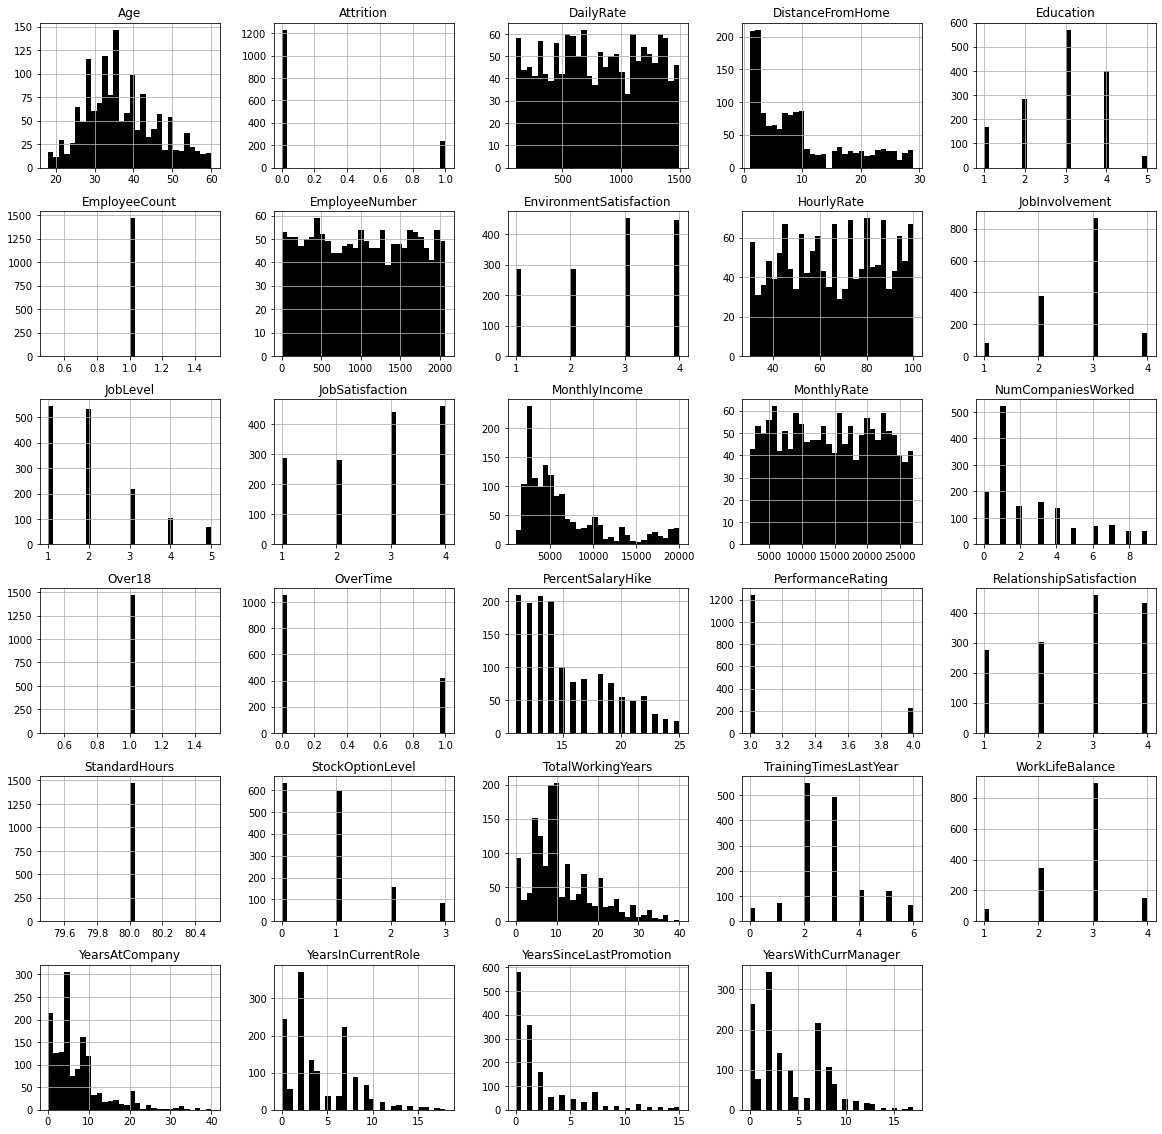

In [ ]:
#Histograms of the data 
HR.hist(bins=30, figsize=(20, 20), color = 'black');
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

 It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other

In [ ]:
# Let's drop 'EmployeeNumber' as well
HR.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [ ]:
# Let's see how many employees left the company! 
left_df = HR[HR['Attrition'] == 1]
stayed_df = HR[HR['Attrition']== 0] 

In [ ]:
values = [20, 30]

In [ ]:
def newLegend(fig, newNames):
    newLabels = []
    for item in newNames:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                #fig.data[0].labels[i] = newNames[item]
                newLabels.append(newNames[item])
    fig.data[0].labels = np.array(newLabels)
    return(fig)

In [ ]:
fig = px.histogram(HR, x="Attrition", title="Attrition", color = HR['Attrition'], barmode='group')
#fig=newLegend(fig, {0:"0 - No", 1:"1 - Yes"})
fig.show()

In [ ]:
print('Number of employess who stayed =', len(stayed_df))
print('% of employess who stayed =',1.* len(stayed_df)/len(HR) * 100, '%')

Number of employess who stayed = 1233
% of employess who stayed = 83.87755102040816 %


In [ ]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
print('Number of employess who left =', len(left_df))
print('% of employess who left =',1.* len(left_df)/len(HR) * 100, '%')

Number of employess who left = 237
% of employess who left = 16.122448979591837 %


In [ ]:
stayed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
Attrition,1233.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0


In [ ]:
left_df.describe().T
#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
Attrition,237.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [ ]:
correlations = HR.corr()
fig = px.imshow(correlations, labels=dict(color="Correlation"), title="Correlation between numerical variables")
fig.update_layout(width=700, height=700)
fig.show()
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

A short analysis reveals the following key points:

---

For people who leave the company (on average):

* They are younger: 33 years
* They live further from their work: 11km
* Less satisfaction with the work environment: 2 (Medium) 
* Lower level of work: 1 ()
* Less satisfaction with work: 2 (Medium)
* Lower monthly salary: $ 4800.00
* Work more overtime: 0.5
* Less years in the company: 5
* Fewer years in current position: 2
* Fewer years with current manager: 2.8

## 1.1 Relationship with the Boss (Management)

In [ ]:
fig = px.box(HR, x="YearsWithCurrManager", color="Attrition", labels={'YearsWithCurrManager': 'Years with the Current Manager'}, 
             title='Boxplots of people spending years with a Manager in an Organization')
fig.show()

In [ ]:
HR_man_count=HR.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['YearsWithCurrManager'].count()).reset_index(name='Counts')
fig = px.line(HR_man_count,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization',
              labels={'YearsWithCurrManager': 'Years with the Current Manager'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

## 1.2 Alignment and Involvement

In [ ]:
fig= px.histogram(HR, x="JobInvolvement", title="Atrittion vs Job Involvement", color=HR['Attrition'], barmode='group', histnorm='percent', labels={'JobInvolvement': 'Job Involvement'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [ ]:
fig= px.histogram(HR, x="JobSatisfaction", title= "Atrittion vs Job Satisfaction", color=HR['Attrition'], barmode='group', histnorm='percent', 
                  labels={'JobSatisfaction': 'Job Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [ ]:
fig= px.histogram(HR, x="PerformanceRating", title="Atrittion vs Performance Rating", color=HR['Attrition'], barmode='group', histnorm='percent',
                  labels={'PerformanceRating': 'Performance Rating'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [3, 4],
        ticktext = ['Excellent', 'Outstanding']
        )
)
fig.show()

In [ ]:
fig= px.histogram(HR, x="JobLevel", title= "Atrittion vs Job Level", color=HR['Attrition'], marginal="box", barmode='group',  histnorm='percent', 
                  labels={'JobLevel': 'Job Level'})
fig.show()

In [ ]:
HR_years_count=HR.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['YearsInCurrentRole'].count()).reset_index(name='Counts')
fig = px.line(HR_years_count,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Count of years in current role',
              labels={'YearsInCurrentRole': 'Years In Current Role'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [ ]:
px.treemap(HR, path=["JobRole"], color='Attrition', color_continuous_scale="Bluered_r")

## 1.3 Employee enablement, investment and recognition

In [ ]:
fig= px.histogram(HR, x="WorkLifeBalance", title="Atrittion vs Work-Life Balance", color=HR['Attrition'], barmode='group', histnorm='percent',
                  labels={'WorkLifeBalance': 'Work Life Balance'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Bad', 'Good', 'Better', 'Best']
        )
)
fig.show()

* Management (81%)
* Alignment and involvement (73%)
* Employee enablement (69%)
* Collaboration and teamwork (65%)
* Feedback and recognition (62%)
* Investment in people (57%)
* Compensation and benefits (53%)

In [ ]:
fig= px.histogram(HR, x="TrainingTimesLastYear", title= "Atrittion vs Training Times Last Year", color=HR['Attrition'], barmode='relative', 
                   histnorm= 'percent', labels={'TrainingTimesLastYear': 'Training Times Last Year'})
fig.show()

In [ ]:
HR_man_count=HR.groupby(['YearsSinceLastPromotion','Attrition']).apply(lambda x:x['YearsSinceLastPromotion'].count()).reset_index(name='Counts')
fig = px.line(HR_man_count,x='YearsSinceLastPromotion',y='Counts',color='Attrition',title='Count of years since last promotion',
              labels={'YearsSinceLastPromotion': 'Years Since Last Promotion'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [ ]:
fig = px.box(HR,x='YearsSinceLastPromotion',color='Attrition',title='Boxplots of Years Since Last Promotion',
              labels={'YearsSinceLastPromotion': 'Years Since Last Promotion'})
fig.show()

In [ ]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
job_overtime = HR.groupby(["OverTime", "Attrition"]).agg(count_col=pd.NamedAgg(column="Attrition", aggfunc="count")).reset_index()
fig = px.histogram(job_overtime, x="OverTime", y = 'count_col' ,color="Attrition",  histnorm='percent', color_discrete_sequence=["red", "blue"])
fig.update_layout(barmode='group', legend_traceorder="reversed",
                 xaxis = dict(
        tickmode = 'array',
        tickvals = [0,  1],
        ticktext = ['No', 'Yes']
        ) 
)
fig.show()

In [ ]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## 1.4 Collaboration and teamwork

In [ ]:
fig= px.histogram(HR, x="RelationshipSatisfaction", title= "Atrittion vs Relationship Satisfaction", color=HR['Attrition'], histnorm='percent', barmode='group', 
                  labels={'RelationshipSatisfaction': 'Relationship Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [ ]:
env_satis=HR.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['EnvironmentSatisfaction'].count()).reset_index(name='Counts')
fig = px.area(env_satis,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization', labels={'EnvironmentSatisfaction': 'Environment Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()


## 1.5 Compensation and benefits

In [ ]:
fig = px.box(HR, x = 'Attrition', y = 'MonthlyIncome', color = 'Attrition', labels={'MonthlyIncome': 'Monthly Income'})
fig.update_layout(title = 'Monthly income')
fig.show()

In [ ]:
fig= px.box(HR, x="MonthlyIncome", y='JobRole', title="Job Role vs Monthly Income", color='Attrition', labels={'MonthlyIncome': 'Monthly Income'})
fig.show()

In [ ]:
hike_att=HR.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization', 
        labels={'PercentSalaryHike': 'Percent Salary Hike'})

## 1.6 Personal factors

In [ ]:
fig=px.histogram(HR, x= 'Age', title="Atrittion vs Age", color = HR['Attrition'], marginal="box")
fig.show() 

In [ ]:
fig= px.box(HR, x="MonthlyIncome", y='JobRole', title="Job Role vs Monthly Income", color=HR['Gender'], labels={'JobRole': 'Job Role', 'MonthlyIncome': 'Monthly Income'})
fig.show()

In [ ]:
fig= px.histogram(HR, x="MaritalStatus", title="Atrittion vs Marital Status", color=HR['Attrition'], barmode='group', labels= {'MaritalStatus': 'Marital Status'})
fig.show()

In [ ]:
fig= px.histogram(HR, x="Gender", title="Atrittion vs Gender", color=HR['Attrition'], barmode='group')
fig.show()

In [ ]:
fig= px.histogram(HR, x="Age", title="Atrittion vs Age", color=HR['Attrition'], marginal='box')
fig.show()

In [ ]:
fig= px.histogram(HR, x="TotalWorkingYears", title="Atrittion vs Total Working Years", color=HR['Attrition'], marginal='box', labels= {'TotalWorkingYears': 'Total Working Years'})
fig.show()

In [ ]:
fig = px.box(HR,x='DistanceFromHome',color='Attrition',title='Boxplots of Distance From Home',
              labels={'DistanceFromHome': 'Distance From Home'})
fig.show()

In [ ]:
fig = px.parallel_categories(HR, dimensions= ['EducationField', 'JobRole', 'Attrition'],  color=HR['Education'])
fig.show()

## Data cleaning, final feature selection and preparation for the model

In [ ]:
HR.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [ ]:
X_cat = HR[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

(1470, 26)

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


About DailyRate, HourlyRate and MonthlyRate
<br><br>
* From Sunix Liu (Kaggle User): Monthly rate is the internal charge out rate which will be used to calculate the cost of each employee monthly, in general, the monthly rate will cover salary, social insurance, administration, logistics, over head etc.
HourlyRate and DailyRate. These are not considered because the Standart Hours for every employee are 80 hours.
* I decided to drop these three variables and keep only with "MonthlyIncome" that is the total salary.

In [ ]:
# note that we dropped the target 'Atrittion' to isolate it later
X_numerical = HR[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,3,2,4,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,2,2,2,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,2,1,3,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,3,1,3,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,3,1,2,3468,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,4,2,4,2571,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,2,3,1,9991,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,4,2,2,6142,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,2,2,2,5390,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,3,2,4,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,2,2,2,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,2,1,3,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,3,1,3,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,3,1,2,3468,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,4,2,4,2571,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,2,3,1,9991,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,4,2,2,6142,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,2,2,2,5390,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [ ]:
X.dtype

dtype('float64')

In [ ]:
y = HR['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
from collections import Counter

StratifiedKFold 

In [ ]:
SKF= StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)

# Machine learning models 

## Logistic regression

Logistic regression classifier without SMOTE

In [ ]:
model_LR = LogisticRegression(random_state=42, max_iter=500, solver='liblinear', class_weight='balanced')

In [ ]:
predictions_LR = cross_val_predict(model_LR, X, y, cv = SKF)

In [ ]:
print(classification_report(y, predictions_LR))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1233
           1       0.37      0.73      0.49       237

    accuracy                           0.76      1470
   macro avg       0.65      0.74      0.66      1470
weighted avg       0.84      0.76      0.78      1470



Logistic regression classifier with SMOTE

In [ ]:
SMOTE_LR_pipeline = make_pipeline(SMOTE(random_state=42), LogisticRegression(random_state=42, max_iter=500, solver='liblinear'))

In [ ]:
predictions_LR = cross_val_predict(SMOTE_LR_pipeline, X, y, cv = SKF)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

In [ ]:
print(classification_report(y, predictions_LR))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1233
           1       0.38      0.69      0.49       237

    accuracy                           0.77      1470
   macro avg       0.65      0.73      0.67      1470
weighted avg       0.84      0.77      0.79      1470



## Random Forest

Random Forest Classifier without SMOTE

In [ ]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, criterion='entropy')

In [ ]:
predictions_RF = cross_val_predict(model_RF, X, y, cv = SKF)

In [ ]:
print(classification_report(y, predictions_RF))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.76      0.16      0.26       237

    accuracy                           0.86      1470
   macro avg       0.81      0.57      0.59      1470
weighted avg       0.84      0.86      0.81      1470



Random Forest Classifier with SMOTE

In [ ]:
SMOTE_RF_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(random_state=42, n_jobs=-1, criterion='entropy'))

In [ ]:
predictions_RF = cross_val_predict(SMOTE_RF_pipeline, X, y, cv = SKF)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

In [ ]:
print(classification_report(y, predictions_RF))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1233
           1       0.73      0.29      0.42       237

    accuracy                           0.87      1470
   macro avg       0.80      0.64      0.67      1470
weighted avg       0.85      0.87      0.84      1470



## SVC

In [ ]:
from sklearn.svm import SVC

SVC without SMOTE

In [ ]:
model_SVC = SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
predictions_SVC = cross_val_predict(model_SVC, X, y, cv = SKF)

In [ ]:
print(classification_report(y, predictions_SVC))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1233
           1       0.44      0.64      0.52       237

    accuracy                           0.81      1470
   macro avg       0.68      0.74      0.70      1470
weighted avg       0.84      0.81      0.82      1470



SVC with SMOTE

In [ ]:
SMOTE_SVC_pipeline = make_pipeline(SMOTE(random_state=42), SVC(class_weight='balanced', probability=True))

In [ ]:
predictions_SVC = cross_val_predict(SMOTE_SVC_pipeline, X, y, cv = SKF)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

In [ ]:
print(classification_report(y, predictions_SVC))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1233
           1       0.46      0.49      0.47       237

    accuracy                           0.83      1470
   macro avg       0.68      0.69      0.68      1470
weighted avg       0.83      0.83      0.83      1470



##Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ADA = AdaBoostClassifier(n_estimators=150, random_state=42)

In [ ]:
predictions_ADA = cross_val_predict(model_ADA, X, y, cv = SKF)

In [ ]:
print(classification_report(y, predictions_ADA))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1233
           1       0.66      0.46      0.54       237

    accuracy                           0.87      1470
   macro avg       0.78      0.71      0.73      1470
weighted avg       0.86      0.87      0.87      1470



## XGB Boost

XGB Boost Classifier without SMOTE

In [ ]:
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 5.203


In [ ]:
model_XGB = xgb.XGBClassifier(n_estimators=500, n_jobs=-1, nthread=-1, scale_pos_weight=5.203, random_state=42)

In [ ]:
predictions_XGB = cross_val_predict(model_XGB, X, y, cv = SKF)

In [ ]:
print(classification_report(y, predictions_XGB))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1233
           1       0.55      0.48      0.51       237

    accuracy                           0.85      1470
   macro avg       0.73      0.70      0.71      1470
weighted avg       0.85      0.85      0.85      1470



Comparing the models, AdaBoost and XGBoost appear to be the most promising models, so lets apply to it the tuning of the hyperparameters and after that, both the tuning and SMOTE together

## AdaBoost - gridsearch and SMOTE

AdaBoost with gridsearch

In [ ]:
ADA_param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 400, 500, 700, 1000],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

In [ ]:
model_ADA = AdaBoostClassifier(random_state=42)
grid_ada = GridSearchCV(param_grid=ADA_param_grid, estimator=model_ADA, 
                        scoring='f1_weighted', cv=SKF, verbose=1, n_jobs=-1)

In [ ]:
grid_ada.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  8.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                           0.6, 0.7, 0.8, 0.9, 1],
                         'n_estimators': [100, 150, 200, 250, 300, 400, 500,
                                          700, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=1)

In [ ]:
print("Best parameters found: ", grid_ada.best_params_)

Best parameters found:  {'learning_rate': 0.7, 'n_estimators': 300}


In [ ]:
model_ADA = AdaBoostClassifier(n_estimators=300, learning_rate = 0.7, random_state=42)
predictions_ADA = cross_val_predict(model_ADA, X, y, cv = SKF)
print(classification_report(y, predictions_ADA))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1233
           1       0.65      0.47      0.55       237

    accuracy                           0.87      1470
   macro avg       0.78      0.71      0.74      1470
weighted avg       0.86      0.87      0.87      1470



AdaBoost Classifier with SMOTE

In [ ]:
SMOTE_ADA_pipeline = make_pipeline(SMOTE(random_state=42),  AdaBoostClassifier(n_estimators=300, learning_rate = 0.7, random_state=42))
predictions_ADA = cross_val_predict(SMOTE_ADA_pipeline, X, y, cv = SKF)
print(classification_report(y, predictions_ADA))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1233
           1       0.58      0.51      0.54       237

    accuracy                           0.86      1470
   macro avg       0.74      0.72      0.73      1470
weighted avg       0.85      0.86      0.86      1470



##XGB Boost - gridsearch and SMOTE

XGB Boost Classifier with gridsearch

In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'max_depth': range(2, 10),
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.7, 0.8, 1],
    'scale_pos_weight': [5.203],
    'colsample_bytree': [0.3, 0.7, 0.10, 0.15, 0.20],
}

In [ ]:
model_XGB = xgb.XGBClassifier(n_jobs=-1, nthread=-1, random_state=42)

In [ ]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [ ]:
model_XGB = xgb.XGBClassifier(n_jobs=-1, nthread=-1, random_state=42)
grid_xgb = GridSearchCV(param_grid=xgb_param_grid, estimator=model_XGB, 
                        scoring='f1', cv=SKF, verbose=1, n_jobs=-1)

In [ ]:
grid_xgb.fit(X, y)

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=-1, objective='binary:logi...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.7, 0.1, 0.15, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': range(2, 10),
                         'min_child_weight': [1, 3, 5, 7],
          

In [ ]:
print("Best parameters found: ", grid_xgb.best_params_)

NameError: ignored

In [ ]:
model_XGB = xgb.XGBClassifier(n_estimators=500, max_depth = 3, min_child_weight = 7, subsample =  0.8, colsample_bytree = 0.15,  
                              n_jobs=-1, nthread=-1, scale_pos_weight=5.203, random_state=42, learning_rate= 0.1)
predictions_XGB = cross_val_predict(model_XGB, X, y, cv = SKF)
print(classification_report(y, predictions_XGB))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1233
           1       0.54      0.60      0.57       237

    accuracy                           0.85      1470
   macro avg       0.73      0.75      0.74      1470
weighted avg       0.86      0.85      0.86      1470



In [ ]:
from xgboost import cv

XGB Boost Classifier with SMOTE

In [ ]:
SMOTE_XGB_pipeline = make_pipeline(SMOTE(random_state=42), xgb.XGBClassifier(n_estimators=500, max_depth = 3, min_child_weight = 7, subsample =  0.8, colsample_bytree = 0.15,  n_jobs=-1, nthread=-1, scale_pos_weight=5.203, random_state=42, learning_rate= 0.1))

In [ ]:
predictions_XGB = cross_val_predict(SMOTE_XGB_pipeline, X, y, cv = SKF)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

In [ ]:
print(classification_report(y, predictions_XGB))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1233
           1       0.53      0.61      0.57       237

    accuracy                           0.85      1470
   macro avg       0.73      0.75      0.74      1470
weighted avg       0.86      0.85      0.85      1470

